# Análisis de los 25 retailers más grandes de Estados Unidos

In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__

'1.2.5'

In [2]:
# Formato de decimales en pandas 
# Nota: se usará el formato de separación de decimales del inglés (,)
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
# Importar datos aquí
df = pd.read_csv('/work/largest_us_retailers.csv')


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [4]:
# Organizamos los datos y creamos un nuevo dataframe
df_sorted_sales = df.sort_values('Sales', ascending=0)

# Cálculo del valor promedio sin contar la compañía dominante
sales_mean = round(df_sorted_sales['Sales'][1:].mean(), 2)
print("El promedio de ventas sin contar la compañía dominante es de {}".format(sales_mean))

El promedio de ventas sin contar la compañía dominante es de 46602.42


El promedio de ventas sin contar la compañía dominante (Walmart US) es de **46,602.42** millones de dólares.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

[Text(0, 0, 'Walmart US'),
 Text(1, 0, 'Kroger'),
 Text(2, 0, 'Costco'),
 Text(3, 0, 'Home Depot'),
 Text(4, 0, 'Walgreen Boots'),
 Text(5, 0, 'CVS incl. Target'),
 Text(6, 0, 'Amazon'),
 Text(7, 0, 'Target'),
 Text(8, 0, "Lowe's"),
 Text(9, 0, 'Albertsons'),
 Text(10, 0, "Sam's Club"),
 Text(11, 0, 'Apple incl. Online'),
 Text(12, 0, 'Best Buy'),
 Text(13, 0, 'Publix'),
 Text(14, 0, 'Rite Aid'),
 Text(15, 0, 'Ahold'),
 Text(16, 0, "Macy's"),
 Text(17, 0, 'TJX'),
 Text(18, 0, 'Aldi'),
 Text(19, 0, 'Dollar General'),
 Text(20, 0, 'Dollar Tree'),
 Text(21, 0, 'HEB'),
 Text(22, 0, "Kohl's"),
 Text(23, 0, 'Delhaize'),
 Text(24, 0, 'Meijer')]

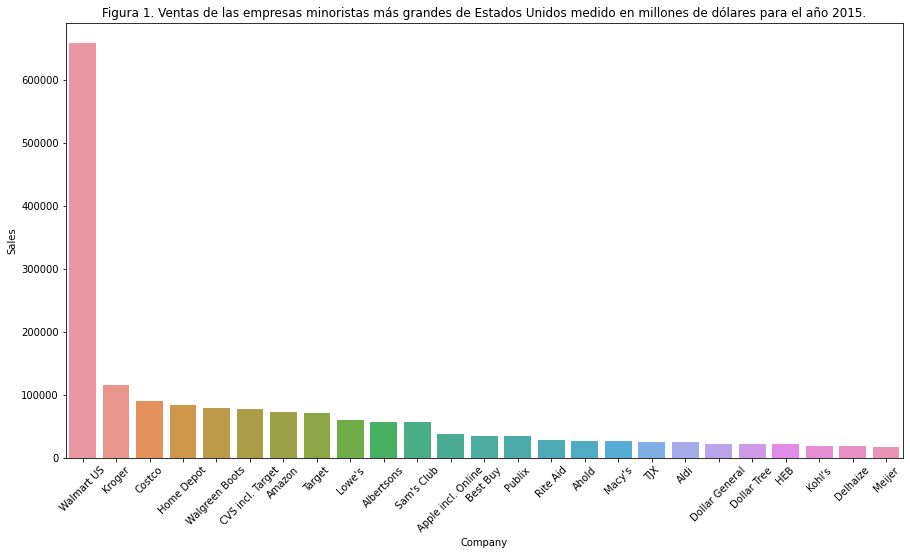

In [5]:
x = df_sorted_sales['Company'] # Eje X
y = df_sorted_sales['Sales']   # Eje Y

plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y) 
# Titulo y rotación de los nombres de las compañías
ax.set(title = "Figura 1. Ventas de las empresas minoristas más grandes de Estados Unidos medido en millones de dólares para el año 2015.") 
ax.set_xticklabels(df_sorted_sales['Company'], rotation=45)

In [6]:
sales_total = df_sorted_sales["Sales"].sum()
sales_five = df_sorted_sales["Sales"][0:8].sum()
sales_porc = round((sales_five/sales_total)*100, 2)

print('''Las 8 principales compañías venden {} millones de dólares, 
representando un {}% del total del ventas para el periodo seleccionado.'''.format(sales_five, sales_porc))

Las 8 principales compañías venden 1246791 millones de dólares, 
representando un 70.18% del total del ventas para el periodo seleccionado.


In [7]:
sales_wal = df_sorted_sales["Sales"][0:1].sum()
sales_porc_wal = round((sales_wal/sales_total)*100, 2)

print("Walmart US vende {} millones de dólares, representando un {}% de cuota de mercado.".format(sales_wal, sales_porc_wal))

Walmart US vende 658119 millones de dólares, representando un 37.04% de cuota de mercado.


La figura 1 refleja las ventas de las empresas minoristas más grandes de Estados Unidos medido en millones de dólares para el año 2015, donde se evidencia que las 8 principales compañías venden **1,246,791.00** millones de dólares, representando un **70.18%** del total del ventas en el periodo seleccionado.

Es de notar que Walmart US es la compañía que más ventas ha tenido con **$658,119.00** millones de dólares, esto refleja un **37,04%** de cuota de mercado, lo que la posiciona como empresa dominante.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

In [8]:
# Organizamos los datos y creamos un nuevo dataframe
df_sorted_store = df.sort_values('Stores', ascending=0)
df_sorted_store.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,"14,250.000",1.564,0.080,Dollar Stores
19,Dollar General,22234,"13,350.000",1.769,0.132,Dollar Stores
5,CVS incl. Target,77792,"9,813.000",8.826,0.256,Drug Stores
4,Walgreen Boots,78924,"8,002.000",9.811,-0.011,Drug Stores
0,Walmart US,658119,"4,574.000",65.650,0.013,Supercenters


De acuerdo a la tabla anterior, las cinco compañías que más tiendas físicas poseen son **Dollar Tree (14,250.00), Dollar General (13,350.00), CVS incl. Target (9,813.00), Walgreen Boots (8,002.00) y Walmart US (4,574.00)**.


In [9]:
stores_total = df_sorted_store["Stores"].sum()
stores_five = df_sorted_store["Stores"][0:5].sum()
stores_porc = round((stores_five/stores_total)*100, 2)

print('''Las 5 principales compañías tienen {} tiendas físicas, 
representando un {}% del total del tiendas para el periodo seleccionado.'''.format(stores_five, stores_porc))


Las 5 principales compañías tienen 49989.0 tiendas físicas, 
representando un 62.7% del total del tiendas para el periodo seleccionado.


In [10]:
stores_total = df_sorted_store["Stores"].sum()
stores_dtree = df_sorted_store["Stores"][0:1].sum()
stores_porc = round((stores_dtree/stores_total)*100, 2)

print("Dollar Tree tiene {} tiendas físicas, representando un {}% del total de tiendas.".format(stores_dtree, stores_porc))


Dollar Tree tiene 14250.0 tiendas físicas, representando un 17.87% del total de tiendas.


[Text(0, 0, 'Dollar Tree'),
 Text(1, 0, 'Dollar General'),
 Text(2, 0, 'CVS incl. Target'),
 Text(3, 0, 'Walgreen Boots'),
 Text(4, 0, 'Walmart US'),
 Text(5, 0, 'Rite Aid'),
 Text(6, 0, 'Kroger'),
 Text(7, 0, 'TJX'),
 Text(8, 0, 'Albertsons'),
 Text(9, 0, 'Aldi'),
 Text(10, 0, 'Home Depot'),
 Text(11, 0, "Lowe's"),
 Text(12, 0, 'Target'),
 Text(13, 0, 'Best Buy'),
 Text(14, 0, 'Publix'),
 Text(15, 0, 'Delhaize'),
 Text(16, 0, "Kohl's"),
 Text(17, 0, "Macy's"),
 Text(18, 0, 'Ahold'),
 Text(19, 0, "Sam's Club"),
 Text(20, 0, 'Costco'),
 Text(21, 0, 'HEB'),
 Text(22, 0, 'Meijer'),
 Text(23, 0, 'Amazon'),
 Text(24, 0, 'Apple incl. Online')]

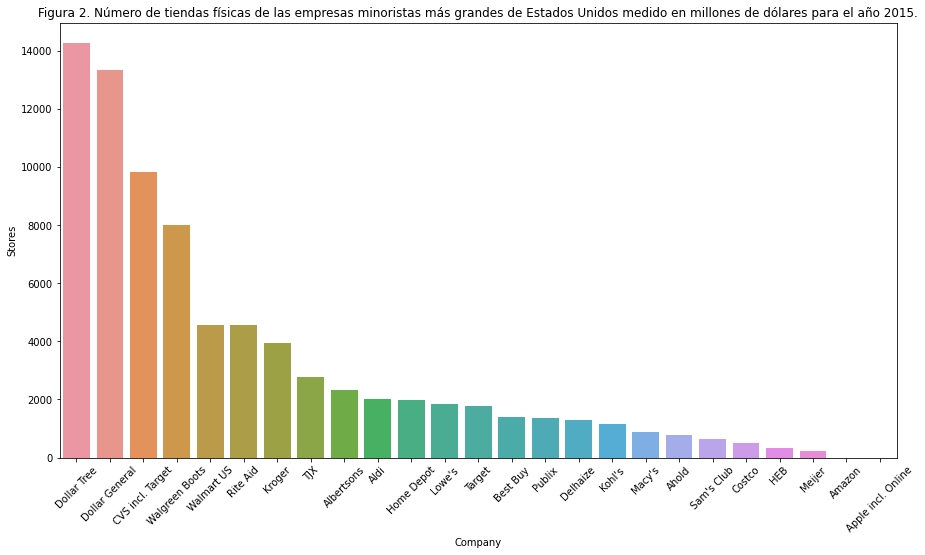

In [11]:
df_sorted_store = df.sort_values('Stores', ascending=0)

x = df_sorted_store['Company'] 
y = df_sorted_store['Stores']

plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y)

ax.set(title = "Figura 2. Número de tiendas físicas de las empresas minoristas más grandes de Estados Unidos medido en millones de dólares para el año 2015.") 
ax.set_xticklabels(df_sorted_store['Company'], rotation=45)

La figura 2 representa el número de tiendas físicas de las empresas minoristas más grandes de Estados Unidos para el año 2015, donde se evidencia que las 5 principales compañías acumulan **49,989.00** tiendas físicas, representando un **62.7%** del total de tiendas físicas en el periodo seleccionado.

Es de notar que **Dollar Tree** es la compañía que más tiendas físicas posee con **$14,250.00** unidades, esto representa un **17.87%** del total de tiendas, por el contrario **Apple incl. Online** y **Amazon** no tienen tiendas físicas.



### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

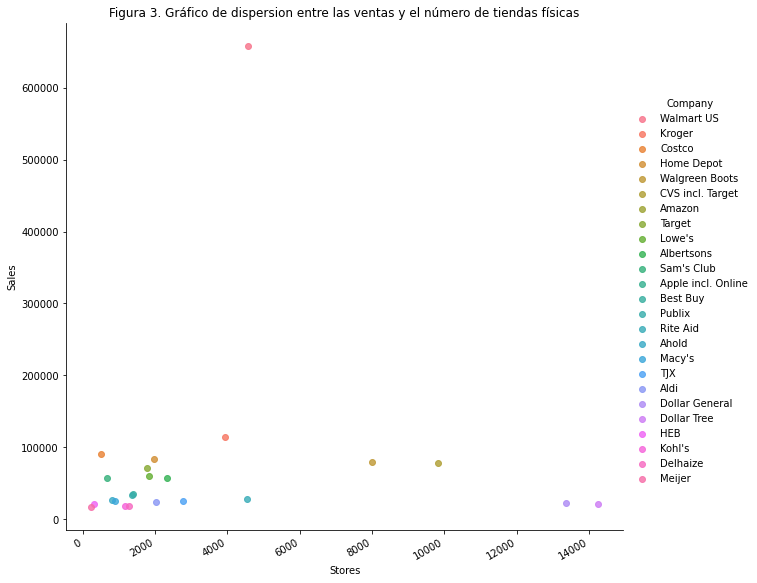

In [12]:
# Gráfico de dispersión
g = sns.lmplot(
    data=df,
    x="Stores", y="Sales", hue="Company",
    height=9
)
g.fig.autofmt_xdate()
g.set(title = '''Figura 3. Gráfico de dispersion entre las ventas y el número de tiendas físicas''') 
g.set_axis_labels("Stores", "Sales")

In [13]:
# Correlacion entre las ventas y el número de tiendas físicas
df[["Sales","Stores"]].corr()

,Sales,Stores
Sales,1.000,0.063
Stores,0.063,1.000


De acuerdo con el gráfico de dispersición de la figura 3, parece no existir evidencia que relacione un mayor número de ventas (Sales) con un mayor número de tiendas (Stores).

Para complementar el análisis se usó una matriz de correlación entre las variales Sales y Stores, encontrando un valor de $\rho$: **0,071**, lo que indica una baja correlación entre las variables, reafirmando las conclusiones derivadas del gráfico de dispersión.

A raíz de los resultados, un mayor número de tiendas físicas no representa un mayor número de ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [14]:
Sales_min = df_sorted_sales['Sales'].min()
Sales_max = df_sorted_sales['Sales'].max()
print("El rango entre las ventas es {} y el {}".format(Sales_min, Sales_max))

El rango entre las ventas es 16592 y el 658119


En concordancia con los resultados, se evidencia que la compañía **Walmart US** representa el valor máximo de ventas con **658,119.00** millones de dólares, mientras que, la compañía **Meijer** representa el valor mínimo de ventas con **16.592,00** millones de dólares, esto indica que **Walmart US** vende 39,66 veces más que **Meijer** para el periodo seleccionado.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

[Text(0.5, 1.0, 'Figura 5. Las 5 empresas minoristas más grandes de EEUU, que más número de ventas tienen en EEUU en el periodo 2015.')]

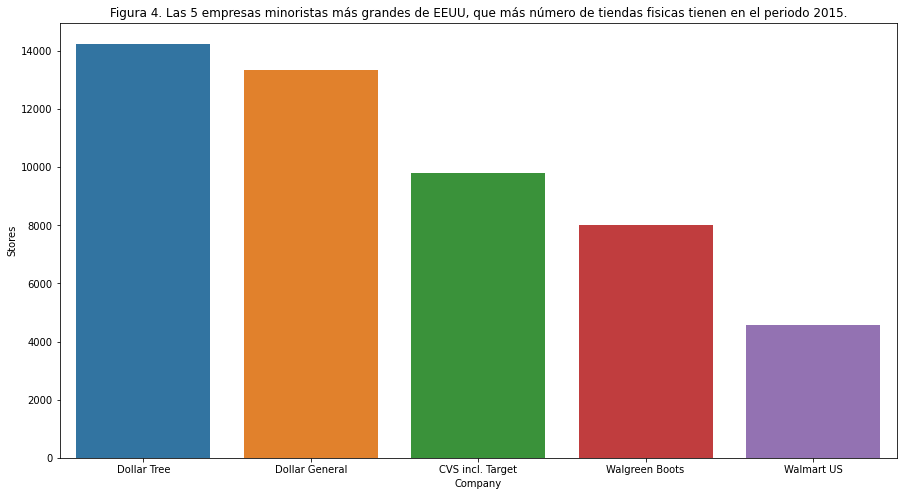

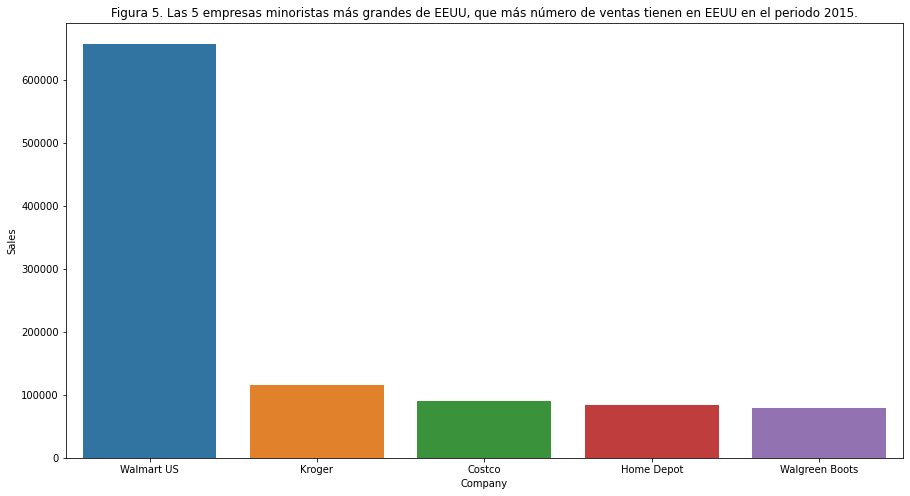

In [15]:
# Gráfico 1
x = df_sorted_store['Company'][0:5] # definición de ejes
y = df_sorted_store['Stores'][0:5]

plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y)
ax.set(title = '''Figura 4. Las 5 empresas minoristas más grandes de EEUU, que más número de tiendas fisicas tienen en el periodo 2015.''') 

# Gráfico 2
x = df_sorted_sales['Company'][0:5] # definición de ejes
y = df_sorted_sales['Sales'][0:5]
plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y)
ax.set(title = '''Figura 5. Las 5 empresas minoristas más grandes de EEUU, que más número de ventas tienen en EEUU en el periodo 2015.''') 



De acuerdo a la figura 4 y 5, **Dollar Tree (14,250.00), Dollar General (13,350.00), CVS incl. Target (9,813.00), Walgreen Boots (8,002.00) y Walmart US (4,574.00)** son las cinco (5) compañías que más tiendas físicas tienen, de las cuales solo **Walmart US** se encuentra entre las compañías que más ventas obtuvieron con **658,119.00** millones de dólares. Esto parece indicar que un número alto de tiendas no indica mayor volumen de ventas.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [16]:
# Agrupamos por categorias
df_cat = df.groupby('Category')
df_cat_top = df_cat.mean().sort_values('Sales', ascending=0)
df_cat_top[0:1]

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Supercenters,"248,639.667","2,192.333",60.123,0.029


De acuerdo a la tabla anterior, la categoría que más ventas tiene es **Supercenters** con **248,639.66** millones de dólares.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [17]:
df_avg_top = df.sort_values('Sales/Avg. Store', ascending=0)
df_avg_top[0:1]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.000,187.796,0.067,Warehouse Club


De acuerdo a la tabla anterior, la compañía que en relación con su cantidad de tiendas físicas genera más ventas es **Costco** con **187.79** millones de dólares por tienda fisica.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [18]:
# Identificamos cuales empresas no tienen tienda, eso indica que es un ecommerce
df["Companies"]=df["Company"]
df_ecommerce = df.set_index('Company')
df_ecommerce["Stores"].isnull()

Company
Walmart US            False
Kroger                False
Costco                False
Home Depot            False
Walgreen Boots        False
CVS incl. Target      False
Amazon                 True
Target                False
Lowe's                False
Albertsons            False
Sam's Club            False
Apple incl. Online     True
Best Buy              False
Publix                False
Rite Aid              False
Ahold                 False
Macy's                False
TJX                   False
Aldi                  False
Dollar General        False
Dollar Tree           False
HEB                   False
Kohl's                False
Delhaize              False
Meijer                False
Name: Stores, dtype: bool

Solo las compañías **Amazon** y **Apple incl. Online** son tiendas online

In [19]:
# Nombres de las compañías
df["Companies"].values

array(['Walmart US', 'Kroger', 'Costco', 'Home Depot', 'Walgreen Boots',
       'CVS incl. Target', 'Amazon', 'Target', "Lowe's", 'Albertsons',
       "Sam's Club", 'Apple incl. Online', 'Best Buy', 'Publix',
       'Rite Aid', 'Ahold', "Macy's", 'TJX', 'Aldi', 'Dollar General',
       'Dollar Tree', 'HEB', "Kohl's", 'Delhaize', 'Meijer'], dtype=object)

In [20]:
# Creamos el dataframe de los commerce
df_commerce = df.set_index('Company')
df_commerce = df_commerce.loc[['Walmart US', 'Kroger', 'Costco', 'Home Depot', 'Walgreen Boots',
       'CVS incl. Target', 'Target', "Lowe's", 'Albertsons',
       "Sam's Club", 'Best Buy', 'Publix',
       'Rite Aid', 'Ahold', "Macy's", 'TJX', 'Aldi', 'Dollar General',
       'Dollar Tree', 'HEB', "Kohl's", 'Delhaize', 'Meijer']]
df_commerce.head()

,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Companies
Company,,,,,,
Walmart US,658119,"4,574.000",65.650,0.013,Supercenters,Walmart US
Kroger,115037,"3,931.000",30.032,0.054,Grocery,Kroger
Costco,90048,495.000,187.796,0.067,Warehouse Club,Costco
Home Depot,83976,"1,965.000",42.736,0.000,Home Improvement,Home Depot
Walgreen Boots,78924,"8,002.000",9.811,-0.011,Drug Stores,Walgreen Boots


In [21]:
# Creamos el dataframe de los ecommerce
df_ecommerce = df_ecommerce.loc[["Amazon","Apple incl. Online"]]
df_ecommerce.head()

,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Companies
Company,,,,,,
Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,Amazon
Apple incl. Online,37664,NaN,NaN,NaN,NaN,Apple incl. Online


In [22]:
sales_total = df["Sales"].sum()
sales_ecommerce = df_ecommerce["Sales"].sum()
sales_porc_ecommerce = round((sales_ecommerce/sales_total)*100, 2)

print('''Las empresas minoristas más grandes de Estados Unidos de ecommerce que más venden, 
facturan en total {} millones de dólares, representando un {}% de cuota de mercado.'''.format(sales_ecommerce, sales_porc_ecommerce))

Las empresas minoristas más grandes de Estados Unidos de ecommerce que más venden, 
facturan en total 109351 millones de dólares, representando un 6.16% de cuota de mercado.


In [23]:
sales_commerce_max = df_commerce["Sales"][0:5].sum()
sales_porc_commerce_max = round((sales_commerce_max/sales_total)*100, 2)

print('''Las 5 empresas minoristas más grandes de Estados Unidos con tiendas físicas que más venden, 
facturan en total {} millones de dólares, representando un {}% de cuota de mercado.'''.format(sales_commerce_max, sales_porc_commerce_max))

Las 5 empresas minoristas más grandes de Estados Unidos con tiendas físicas que más venden, 
facturan en total 1026104 millones de dólares, representando un 57.76% de cuota de mercado.


In [24]:
sales_total = df["Sales"].sum()
sales_commerce_min = df_commerce["Sales"][-5:].sum()
sales_porc_commerce_min = round((sales_commerce_min/sales_total)*100, 2)

print('''Las 5 empresas minoristas más grandes de Estados Unidos con tiendas físicas que menos venden, 
facturan en total {} millones de dólares, representando un {}% de cuota de mercado.'''.format(sales_commerce_min, sales_porc_commerce_min))

Las 5 empresas minoristas más grandes de Estados Unidos con tiendas físicas que menos venden, 
facturan en total 96701 millones de dólares, representando un 5.44% de cuota de mercado.


[Text(0.5, 1.0, 'Figura 8. Empresas minoristas más grandes de Estados Unidos con tiendas físicas que menos venden, medido en millones de dólares para el año 2015.')]

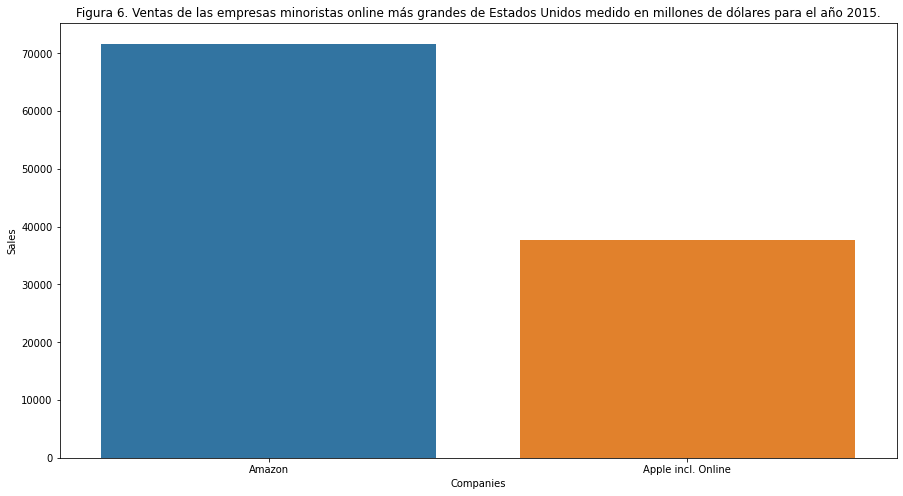

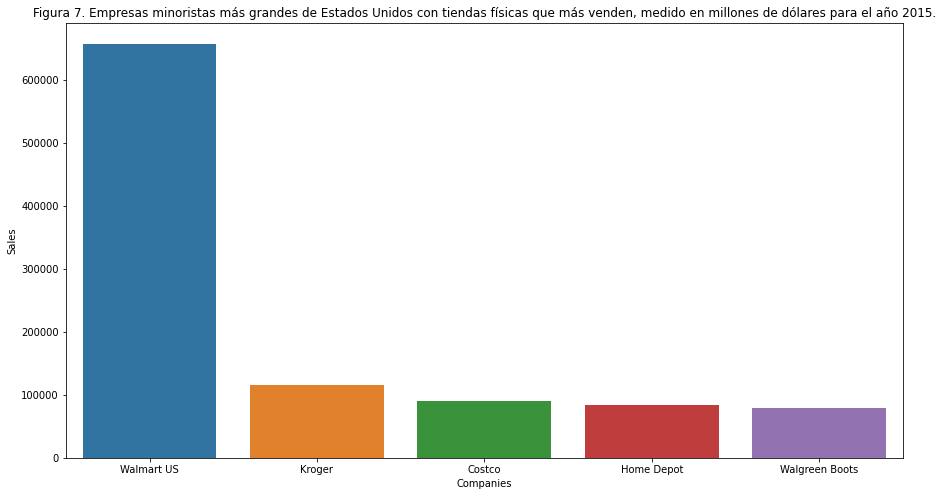

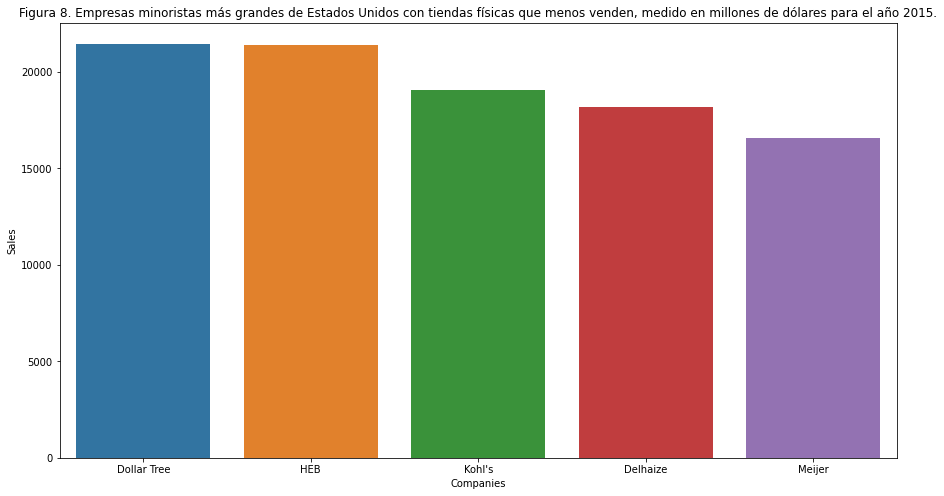

In [25]:
# Grafico 6
x = df_ecommerce['Companies']
y = df_ecommerce['Sales']

plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y)
ax.set(title = '''Figura 6. Ventas de las empresas minoristas online más grandes de Estados Unidos medido en millones de dólares para el año 2015.''') 

# Grafico 7
x = df_commerce['Companies'][0:5]#Aplicamos slicing como en una lista de Python.
y = df_commerce['Sales'][0:5]

plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y)
ax.set(title = '''Figura 7. Empresas minoristas más grandes de Estados Unidos con tiendas físicas que más venden, medido en millones de dólares para el año 2015.''') 

# Grafico 8
x = df_commerce['Companies'][-5:]#Aplicamos slicing como en una lista de Python.
y = df_commerce['Sales'][-5:]

plt.figure(figsize = (15,8))
ax = sns.barplot(x = x, y = y)
ax.set(title = '''Figura 8. Empresas minoristas más grandes de Estados Unidos con tiendas físicas que menos venden, medido en millones de dólares para el año 2015.''') 

A la luz de los resultados, se extraen las siguientes obsevaciones.

Las empresas minoristas más grandes de Estados Unidos de ecommerce son **Amazon** y **Apple incl. Online**, ambas facturan en total **109,351.00** millones de dólares, representando un **6.16%** de cuota de mercado.

Las 5 empresas minoristas más grandes de Estados Unidos con tiendas físicas que más venden (commercetop) son **Walmart US, Kroger, Costco, Home Depot y Walgreen Boots**, facturando en total **1,026,104.00** millones de dólares, representando un **57.76%** de cuota de mercado.

Las 5 empresas minoristas más grandes de Estados Unidos con tiendas físicas que menos venden (commercebottom) son **Dollar Tree, HEB, Kohl's, Delhaize, Meijer**, facturando en total **96,701.00** millones de dólares, representando un **5.44%** de cuota de mercado.

En tal sentido **Amazon** y **Apple incl. Online** venden exclusivamente de forma online (ecommerce), su cuota de mercado es muy pequeña en comparación con los commercetop, y a su vez, su cuota de mercado es más grande con las commercebottom, por lo que se concluye que las empresas de ecommerce pueden crecer en su cuota de mercado en el largo plazo, ya que el ecommerce es un sector que potencialmente crecerá en los próximos años.


## III. Tus propias preguntas

### 10. ¿Existe relación de dependencia entre la variable nivel de ventas (Sales) en función del número de tiendas (Stores)?

In [26]:
import statsmodels.api as sm

In [27]:
# Convertimos los NaN a valor 0
df = df.fillna(0)

In [28]:
# Modelo de regresión simple

exog_vars = ["Stores"]
exog = sm.add_constant(df[exog_vars])
endg = df["Sales"]

MiModelo = sm.OLS(endg, exog)
Resultado = MiModelo.fit()
print(Resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1159
Date:                Tue, 22 Feb 2022   Prob (F-statistic):              0.737
Time:                        16:31:24   Log-Likelihood:                -328.38
No. Observations:                  25   AIC:                             660.8
Df Residuals:                      23   BIC:                             663.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.395e+04    3.3e+04      1.938      0.0

La tabla anterior confirma la hipótesis que no existe relación entre las ventas (Sales) en función del número de tiendas físicas (Stores), por lo que se extraen las siguientes conclusiones.

1. Se observa que la variable **Stores** no es estadísticamente significativa de forma individual (0.737 > 0,05). 
2. No son estadísticamente significativa en conjunto (0.737 > 0,05).
3. **R-squared: 0,005**, por lo que es casi nula. (el R-squared indica qué tanto el modelo es explicado por las variables independientes).
4. El modelo no tiene propiedades estadísticas deseables. 

Es probable que se encuentren problemas de tipo econométrico (multicolinealidad, heterocedasticidad, error de especificación, entre otros), pero para efectos de este análisis, el modelo no es de interés a la investigación.

Nota 1: Se evaluó con un alfa de 5%.
Nota 2: No se probó normalidad de residuos.

### 11. ¿Cúales son las categorías de las empresas que más venden y las que menos venden?

In [29]:
# Clasificamos por grupo
df_cat = df.groupby('Category')
df_cat_top = df_cat.mean().sort_values('Sales', ascending=0)
# Las categorias que más ventas tienen
df_cat_top[0:3]

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Supercenters,"248,639.667","2,192.333",60.123,0.029
Warehouse Club,"90,048.000",495.000,187.796,0.067
Home Improvement,"72,143.500","1,896.500",38.024,0.010


In [30]:
# Las categorías que más venden
sales_total_cat = df_cat_top["Sales"].sum()
sales_cat_top = df_cat_top["Sales"][0:3].sum()
sales_porc_cat = round((sales_cat_top/sales_total_cat)*100, 2)

print('''Las 3 principales categorías venden {} millones de dólares, 
representando un {}% del total del ventas para el periodo seleccionado.'''.format(sales_cat_top, sales_porc_cat))

Las 3 principales categorías venden 410831.1666666666 millones de dólares, 
representando un 52.32% del total del ventas para el periodo seleccionado.


In [31]:
# Las categorias que menos ventas tienen
df_cat_top[-3:]

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Apparel,"25,012.000","2,770.000",9.370,0.078
Department Stores,"22,544.000","1,029.000",23.398,0.044
Dollar Stores,"21,849.000","13,800.000",1.666,0.106


In [32]:
# Las categorías que menos venden
sales_total_cat2 = df_cat_top["Sales"].sum()
sales_cat_button = df_cat_top["Sales"][-3:].sum()
sales_porc_cat2 = round((sales_cat_button/sales_total_cat2)*100, 2)

print('''Las 3 categorías venden {} millones de dólares, 
representando un {}% del total del ventas para el periodo seleccionado.'''.format(sales_cat_button, sales_porc_cat2))

Las 3 categorías venden 69405.0 millones de dólares, 
representando un 8.84% del total del ventas para el periodo seleccionado.


Las tres (3) categorías que más venden son **Supercenters, Warehouse Club y Home Improvement**
facturando **410,831.16** millones de dólares, representando un **54.95%** de la cuota de mercado.

Por el contrario, las tres (3) categorías que menos venden son **Apparel, Department Stores y Dollar Stores**, facturando **69,405.0** millones de dólares, lo que representa un **9.28%** de cuota de mercado.


### 12. ¿Cúales son las 5 empresas con mayor crecimiento de tiendas físicas?

In [33]:
df_sorted_growth = df.sort_values('Store Count Growth', ascending=0)
company_growth_name = df_sorted_growth["Company"][0:5]
company_growth_value = df_sorted_growth["Store Count Growth"][0:5] * 100
company_growth_sales = df_sorted_growth["Sales"][0:5]
print(company_growth_name.values)
print(company_growth_value.values)
print(company_growth_sales.values)

['CVS incl. Target' 'Dollar General' 'Aldi' 'Meijer' "Macy's"]
[25.56621881 13.24115701 11.22729774  8.45070422  8.28258222]
[77792 22234 24402 16592 26028]


Las cinco (5) empresas que más han crecido en número de tiendas físicas son: **CVS incl. Target, Dollar General, Aldi, Meijer y Macy's** con un **25.56%, 13.24%, 11.22%,  8.45% y  8.28%**, respectivamente.

Del grupo de empresas seleccionado **CVS incl. Target** es la que mayor facturación obtuvo con **77,792.00** millones de dólares, mientras que, el peor desempeño fue de la empresa **Meijer** con **16,592.00** millones de dólares.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70b9adbc-b474-459b-8d99-ea338a2f0900' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>